# Strategies

In [1]:
import random

# Alternates Between Cooperation and Defection every Round
class Alternator():
    def __init__(self):
        self.name = 'Alternator'
        self.strategy = 'Grim'
    
    def play(self, own_move, op_move, round):
        # Starts with either C or D
        if own_move == 'start':
            if random.random() < 0.5:
                return 'C'
            else:
                return 'D'
        
        # Plays Opposite of Last Move
        if own_move == 'C':
            return 'D'
        else:
            return 'C'

In [2]:
# Tries to Appease the Opponent by Cooperating when both Player and Opponent had Defected Last Round
class Appeaser():
    def __init__(self):
        self.name = 'Appeaser'
        self.strategy = 'Good'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        # First Round Cooperation
        if round == 1:
            return 'C'
        else:
            self.own_history.append(own_move)
            self.op_history.append(op_move)

            # Tries Appeasing
            if self.op_history[-1] == 'D':
                if self.own_history[-1] == 'C':
                    return 'D'
                else:
                    return 'C'


In [3]:
# Initially Starts with Random 50% Probability of Cooperation or Defection
# If the Opponent Cooperates more then the Probability of Player Cooperating Increases
class AverageCopier():
    def __init__(self):
        self.name = 'AverageCopier'
        self.strategy = 'Good'
        self.own_history = []
        self.op_history = []
        self.op_cooperations = 0
    
    def play(self, own_move, op_move, round):
        # Starts with C or D randomly
        if round == 1:
            k = random.randint(0, 1)

            if k == 1:
                return 'C'
            else:
                return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if op_move == 'C':
            self.op_cooperations += 1

        # Increases probability of Cooperation if Opponent Cooperates
        p = self.op_cooperations / len(self.op_history)
        
        if random.random() > p:
            return 'D'
        else:
            return 'C'

In [4]:
# Starts with cooperation and continues unless overly provoked
class BenevolentTitan:
    def __init__(self):
        self.name = "Benevolent Titan"
        self.strategy = "Good"
        self.own_history = []
        self.op_history = []
        self.defections = 0
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        if self.op_history[-1] == 'D':
            self.defections += 1
            return 'C' if self.defections < 3 else 'D'  # Returns to cooperation after some time
        return 'C'


In [5]:
# As Rounds Increase it Cooperates More
class BetterAndBetter():
    def __init__(self):
        self.name = 'BetterAndBetter'
        self.strategy = 'Grim'
        self.own_history = []
        self.op_history = []
        self.op_cooperations = 0
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        p = len(self.op_history) / 100
        
        if random.random() < p:
            return 'D'
        else:
            return 'C'

In [6]:
# Always does the opposite of what the opponent does
class Contrarian:
    def __init__(self):
        self.name = "Contrarian"
        self.strategy = "Grim"
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)
        
        return 'D' if self.op_history[-1] == 'C' else 'C'

In [7]:
# Tends to cooperate but acknowledges accidental defections
class ContriteTitForTat:
    def __init__(self):
        self.name = "ContriteTitForTat"
        self.strategy = "Good"
        self.own_history = []
        self.op_history = []
        self.punishment = False
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        elif self.punishment:
            self.punishment = False
            return 'C'
        elif self.op_history[-1] == 'D' and own_move == 'D':
            self.punishment = True
            return 'D'
        else:
            return self.op_history[-1]


In [8]:
# Cooperates for 10 Rounds and then shifts to Tit for Tat
class Davis():
    def __init__(self):
        self.name = 'Davis'
        self.strategy = 'Good'
    
    def play(self, own_move, op_move, round):
        if round <= 10:
            return 'C'
        else:
            return op_move

In [9]:
# Always Defects
class Defector():
    def __init__(self):
        self.name = 'Defector'
        self.strategy = 'Grim'
    
    def play(self, own_move, op_move, round):
        return 'D'

In [10]:

class DoubleResurection():
    def __init__(self):
        self.name = 'DoubleResurection'
        self.strategy = 'Grim'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if len(self.own_history) >= 5 and self.own_history[-5:] == ['C', 'C', 'C', 'C', 'C']:
            return 'D'
        elif len(self.own_history) >= 5 and self.own_history[-5:] == ['D', 'D', 'D', 'D', 'D']:
            return 'C'
        else:
            return self.op_history[-1]

In [11]:
class Downing():
    def __init__(self):
        self.name = 'Downing'
        self.strategy = 'Moderate'
        self.op_history = []
        self.own_history = []
        self.number_opponent_C_in_response_to_C = 0
        self.number_opponent_C_in_response_to_D = 0

        self.cooperations = 0
        self.defections = 0
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if round == 2:
            if self.op_history[-1] == 'C':
                self.number_opponent_C_in_response_to_C += 1
            return 'D'

        if self.own_history[-2] == 'C' and self.op_history[-1] == 'C':
            self.number_opponent_C_in_response_to_C += 1
        if self.own_history[-2] == 'D' and self.op_history[-1] == 'C':
            self.number_opponent_C_in_response_to_D += 1

        # Adding 1 to cooperations for assumption that first opponent move
        # being a response to a cooperation. See docstring for more
        # information.
        alpha = self.number_opponent_C_in_response_to_C / (
            self.cooperations + 1
        )
        # Adding 2 to defections on the assumption that the first two
        # moves are defections, which may not be true in a noisy match
        beta = self.number_opponent_C_in_response_to_D / max(
            self.defections, 2
        )
        expected_value_of_cooperating = alpha * 3 + (1 - alpha) * 0
        expected_value_of_defecting = beta * 4 + (1 - beta) * 1

        if expected_value_of_cooperating > expected_value_of_defecting:
            return 'C'
        if expected_value_of_cooperating < expected_value_of_defecting:
            return 'D'
        return self.own_history[-1].flip()

In [12]:
class ForgivingGrudger:
    def __init__(self):
        self.name = "ForgivingGrudger"
        self.strategy = "Moderate"  # Will return to cooperation after defections
        self.own_history = []
        self.op_history = []
        self.triggered = False
        self.punishment_timer = 0
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        if self.op_history[-1] == 'D':
            self.triggered = True
            self.punishment_timer = 2  # Punish for 2 rounds
        if self.punishment_timer > 0:
            self.punishment_timer -= 1
            return 'D'
        return 'C'


In [13]:
class GrimTrigger:
    def __init__(self):
        self.name = "GrimTrigger"
        self.strategy = "Grim"  # Grim strategies involve long-term punishment for defection
        self.own_history = []
        self.op_history = []
        self.triggered = False
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round > 1 and self.op_history[-1] == 'D':
            self.triggered = True
        return 'D' if self.triggered else 'C'


In [14]:
import random

class GenerousTitForTat:
    def __init__(self):
        self.name = "GenerousTitForTat"
        self.strategy = "Good"  # More forgiving version of Tit for Tat
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        elif self.op_history[-1] == 'D':
            return 'C' if random.random() > 0.1 else 'D'  # Forgives 90% of defections
        else:
            return 'C'


In [15]:
import random

class ForgivingTitForTat:
    def __init__(self):
        self.name = "ForgivingTitForTat"
        self.strategy = "Good"  # Cooperates more often, forgives defections
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        elif self.op_history[-1] == 'D':
            return 'C' if random.random() > 0.2 else 'D'  # Forgives 80% of defections
        else:
            return 'C'


In [16]:
import random

class Joss:
    def __init__(self):
        self.name = "Joss"
        self.strategy = "Grim"  # Mostly cooperative, but adds random defections
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        else:
            if random.random() < 0.1:
                return 'D'  # 10% chance of defection regardless of opponent's move
            return self.op_history[-1]


In [17]:
class Pavlov:
    def __init__(self):
        self.name = "Pavlov"
        self.strategy = "Moderate"
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        
        if round == 1:
            return 'C'  # Starts by cooperating
        elif own_move == op_move:
            return own_move  # Stay with cooperation if both cooperated
        else:
            return 'D' if own_move == 'C' else 'C'  # Defect if either player defected in the previous round


In [18]:
class Prober:
    def __init__(self):
        self.name = "Prober"
        self.strategy = "Grim"  # Mixes cooperation and defection to assess opponent
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        return 'C' if round % 4 != 0 else 'D'  # Defects every fourth round

In [19]:
class Provocateur:
    def __init__(self):
        self.name = "Provocateur"
        self.strategy = "Grim"  # Attempts to provoke a defection from the opponent
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        return 'D' if round % 3 == 0 else 'C'  # Defects every third round

In [20]:
import random

class Random():
    def __init__(self):
        self.name = 'Random'
        self.strategy = 'Grim'
    
    def play(self, own_move, op_move, round):
        if random.random() > 0.5:
            return 'C'
        
        return 'D'

In [21]:
import random

class Reputation:
    def __init__(self):
        self.name = "Reputation"
        self.strategy = "Good"  # Adjusts cooperation based on perceived opponent reputation
        self.own_history = []
        self.op_history = []
        self.cooperation_level = 0.5  # Initial cooperation level
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
            if self.op_history[-1] == 'C':
                self.cooperation_level = min(1, self.cooperation_level + 0.1)
            else:
                self.cooperation_level = max(0, self.cooperation_level - 0.1)
        if round == 1:
            return 'C'
        return 'C' if random.random() < self.cooperation_level else 'D'


In [22]:
class Resurection():
    def __init__(self):
        self.name = 'Resurection'
        self.strategy = 'Good'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if len(self.own_history) >= 5 and self.own_history[-5:] == ['D', 'D', 'D', 'D', 'D']:
            return 'D'
        else:
            return self.op_history[-1]

In [23]:
class Sluggish:
    def __init__(self):
        self.name = "Sluggish"
        self.strategy = "Good"  # Responds to defections but with a delay
        self.own_history = []
        self.op_history = []
        self.defection_response = False
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        
        if round == 1:
            return 'C'
        
        if self.op_history[-1] == 'D':
            self.defection_response = True
            
        return 'D' if self.defection_response and round > 2 else 'C'


In [24]:
class TitForTat():
    def __init__(self):
        self.name = 'TitForTat'
        self.strategy = 'Good'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if own_move == 'start':
            return 'C'

        self.op_history.append(op_move)
        return self.op_history[-1]

In [25]:
class TitForTwoTats:
    def __init__(self):
        self.name = "TitForTwoTats"
        self.strategy = "Good"  # A forgiving strategy, allows some defection before retaliating
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        elif len(self.op_history) >= 2 and self.op_history[-1] == 'D' and self.op_history[-2] == 'D':
            return 'D'
        else:
            return 'C'


In [26]:
strategies = [Alternator(), Appeaser(), AverageCopier(), BenevolentTitan(), BetterAndBetter(), Contrarian(), ContriteTitForTat(), Davis(), Defector(), DoubleResurection(),
              Downing(), ForgivingGrudger(), ForgivingTitForTat(), GenerousTitForTat(), GrimTrigger(), Joss(), Pavlov(), Prober(), Provocateur(), Random(), Reputation(),
              Resurection(), Sluggish(), TitForTat(), TitForTwoTats()]

# Payoff

In [27]:
class PayOffMatrix():
    def __init__(self, default=True):
        self.default = default
        self.default_payoff = {('C', 'C'): [3, 3],
                       ('C', 'D'): [0, 5],
                       ('D', 'C'): [5, 0],
                       ('D', 'D'): [1, 1]
                       }
    
    def return_payoff(self):
        if self.default == True:
            return self.default_payoff
        else:
            return self.user_define()

    def user_define(self):
        user_payoff = {}

        user_payoff[('C', 'C')] = input('What is the payoff for Cooperation and Cooperation?')
        user_payoff[('C', 'D')] = input('What is the payoff for Cooperation and Defection?')
        user_payoff[('D', 'C')] = input('What is the payoff for Defection and Cooperation?')
        user_payoff[('D', 'D')] = input('What is the payoff for Defection and Defection?')

        return user_payoff

# Defining a Game

In [28]:
import matplotlib.pyplot as plt
import random

class Game():
    def __init__(self, player1, player2, payoff, rounds, visualize = False, noise = 0):
        self.p1 = player1
        self.p2 = player2
        self.rounds = rounds
        self.payoff = payoff
        self.visualize = visualize
        self.noise = noise
    
    def play(self):
        p1_score = 0
        p2_score = 0

        p1_history = []
        p2_history = []

        p1Move = self.p1.play(own_move = 'start', op_move = 'C', round = 1)
        p2Move = self.p2.play(own_move = 'start', op_move = 'C', round = 1)

        for round in range(2, self.rounds+1):
            if p1Move == 'C' and p2Move =='C':  
                p1_score += self.payoff['C', 'C'][0]
                p2_score += self.payoff['C', 'C'][1]

            elif p1Move == 'C' and p2Move =='D':
                p1_score += self.payoff['C', 'D'][0]
                p2_score += self.payoff['C', 'D'][1]

            elif p1Move == 'D' and p2Move =='C':
                p1_score += self.payoff['D', 'C'][0]
                p2_score += self.payoff['D', 'C'][1]
            
            elif p1Move == 'D' and p2Move =='D':
                p1_score += self.payoff['D', 'D'][0]
                p2_score += self.payoff['D', 'D'][1]
            
            p1_history.append(p1Move)
            p2_history.append(p2Move)

            prev_p1Move = p1Move
            prev_p2Move = p2Move

            if random.random() < self.noise:
                if random.random() < 0.5:
                    if prev_p1Move == 'C':
                        prev_p1Move = 'D'
                else:
                    if prev_p2Move == 'C':
                        prev_p2Move = 'D'
            
            p1Move = self.p1.play(prev_p1Move, prev_p2Move, round)
            p2Move = self.p2.play(prev_p2Move, prev_p1Move, round)
        
        self.visualize_result(self.visualize, p1_history=p1_history, p2_history=p2_history)
    
        if self.visualize == True:
            if p1_score>p2_score:
                print(self.p1.name,'beats',self.p2.name,p1_score,'-',p2_score)
            elif p2_score>p1_score:    
                print(self.p2.name,'beats',self.p1.name,p2_score,'-',p1_score)
            else:
                print('it was a draw',self.p1.name,p1_score,self.p2.name,p2_score)
        
        return p1_score, p2_score
    
    # Function to plot circles
    def add_circle(self, ax, color, x, y):
        circle = plt.Circle((x, y), 0.1, color=color)
        ax.add_artist(circle)

    def visualize_result(self, visualize, p1_history, p2_history):
        if visualize == False:
            return
        
        # Initialize figure and axes for two rows
        fig, axs = plt.subplots(2, 1, figsize=(5, 5))
        plt.xlim(0, self.rounds-1)
        plt.ylim(0, 1)

        # Iteratively add circles to two rows
        for round in range(self.rounds-1):
            if p1_history[round] == 'C':
                c1 = 'green'
            else:
                c1 = 'red'
            
            if p2_history[round] == 'C':
                c2 = 'green'
            else:
                c2 = 'red'

            # Add red circle in the first row
            self.add_circle(axs[0], c1, round, 0.5)
            
            # Add green circle in the second row
            self.add_circle(axs[1], c2, round, 0.5)

        # Set limits and aspect ratio
        for ax in axs:
            ax.set_xlim(0, self.rounds)
            ax.set_ylim(0, 1)
            ax.set_aspect('equal')

        plt.show()

# def main(args=None):
#     payoff_mat = PayOffMatrix().return_payoff()
#     game = Game(player1=TitForTat, player2=BetterAndBetter, payoff=payoff_mat, rounds=20, visualize=True, noise = 0.1)
#     game.play()

# if __name__ == '__main__':
#     main()

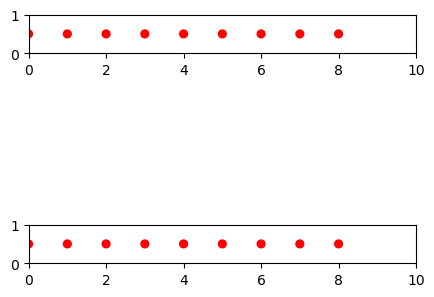

it was a draw Downing 9 Defector 9


(9, 9)

In [29]:
payoff_mat = PayOffMatrix().return_payoff()
game = Game(player1=Downing(), player2=Defector(), payoff=payoff_mat, rounds=10, visualize=True)
game.play()

# Defining a Tournament

In [34]:
import collections

class EvolutionaryTournament:
    def __init__(self, games, rounds, noise, generations, mutation, list_strats):
        self.generations = generations
        self.rounds = rounds
        self.noise = noise
        self.games = games
        self.mutation_probab = mutation
        self.list_strats = list_strats
        self.strategies = self.initialize_population()
        
    def initialize_population(self):
        strategies = []
        repeat_strats = 1

        for strat in self.list_strats:
            for i in range(repeat_strats):
                strategies.append(strat)
        
        self.population_history = {}

        for strat in self.list_strats:
            self.population_history[f'{strat.name}'] = []
        
        return strategies

    def play(self):
        for generation in range(1, self.generations+1):
            scores = {player.name: 0 for player in self.strategies}
            object_scores = {player: 0 for player in self.strategies}
            
            # Play all pairs of strategies
            for game in range(self.games):
                for i in range(len(self.strategies)):
                    for j in range(i + 1, len(self.strategies)):
                        payoff_mat = PayOffMatrix().return_payoff()
                        game = Game(
                            player1=self.strategies[i],
                            player2=self.strategies[j],
                            payoff=payoff_mat,
                            rounds=self.rounds,
                            visualize=False,
                            noise=self.noise
                        )
                        s1, s2 = game.play()
                        scores[self.strategies[i].name] += s1
                        object_scores[self.strategies[i]] += s1

                        scores[self.strategies[j].name] += s2
                        object_scores[self.strategies[j]] += s2
            
            counter = collections.Counter(self.strategies)

            for player in counter:
                self.population_history[player.name].append(counter[player])

            print("Generation: ", generation)
            print(dict(sorted(scores.items(), key=lambda item: item[1], reverse=True)))

            self.evolve(scores)
            
            self.scores = scores
            self.object_scores = object_scores

    def evolve(self, scores):
        # Create a new frequency dictionary based on scores
        frequency = {player.name: 0 for player in self.strategies}
        total_score = sum(scores.values())

        counter = collections.Counter(self.strategies)

        for player in self.strategies:
            if total_score > 0:  # Avoid division by zero
                frequency[player.name] = (1+max(1, int(scores[player.name] / total_score)))*counter[player] # Scale frequencies
                print(int(scores[player.name] / total_score))
        
        # Rebuild the population based on frequency
        new_population = []
        for name, freq in frequency.items():
            strategy = next(s for s in self.strategies if s.name == name)
            new_population.extend([strategy] * freq)  # Add strategy based on frequency

        # Randomly mutate the population
        self.strategies = new_population
        self.mutate_population()

    def mutate_population(self):
        for i in range(len(self.strategies)):
            if random.random() < self.mutation_probab:
                # Replace this strategy with a random new one from the full pool of strategies
                new_strategy = random.choice(self.strategies)
                self.strategies[i] = new_strategy  # Mutate (replace) the strategy

    def show_result(self):
        # final_scores = {player.name: 0 for player in self.strategies}
        # for player in self.strategies:
        #     final_scores[player.name] = player.name  # Just for display, adjust as needed
        # print(dict(sorted(final_scores.items(), key=lambda item: item[1], reverse=True)))
        pass

In [35]:
tournament = EvolutionaryTournament(games=5, rounds=200, noise=0.005, generations=10, mutation=0.001, list_strats=strategies)
tournament.play()
tournament.show_result()

Generation:  1
{'Davis': 51640, 'GrimTrigger': 50416, 'BetterAndBetter': 50400, 'Resurection': 50336, 'Sluggish': 50336, 'Alternator': 50317, 'Downing': 50308, 'Defector': 50204, 'Pavlov': 49525, 'TitForTwoTats': 49496, 'Provocateur': 49164, 'ContriteTitForTat': 48832, 'TitForTat': 48409, 'Benevolent Titan': 47761, 'Prober': 47635, 'Random': 47349, 'AverageCopier': 46948, 'DoubleResurection': 46548, 'Contrarian': 46468, 'ForgivingTitForTat': 45585, 'GenerousTitForTat': 44745, 'Reputation': 44708, 'ForgivingGrudger': 44283, 'Joss': 42568, 'Appeaser': 10973}
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Generation:  2
{'Davis': 210160, 'Resurection': 204752, 'TitForTwoTats': 203495, 'Defector': 203102, 'GrimTrigger': 203078, 'ContriteTitForTat': 202878, 'Downing': 202798, 'BetterAndBetter': 202786, 'Sluggish': 202196, 'Provocateur': 201909, 'Alternator': 200858, 'Pavlov': 200127, 'Benevolent Titan': 198534, 'TitForTat': 196704, 'Prober': 196167, 'Random': 193961, 'Contrarian': 192341

KeyboardInterrupt: 

In [31]:
tournament.population_history

{'Alternator': [1, 2, 4],
 'Appeaser': [1, 2, 4],
 'AverageCopier': [1, 2, 4],
 'Benevolent Titan': [1, 2, 4],
 'BetterAndBetter': [1, 2, 4],
 'Contrarian': [1, 2, 4],
 'ContriteTitForTat': [1, 2, 4],
 'Davis': [1, 2, 4],
 'Defector': [1, 2, 4],
 'DoubleResurection': [1, 2, 4],
 'Downing': [1, 2, 4],
 'ForgivingGrudger': [1, 2, 4],
 'ForgivingTitForTat': [1, 2, 4],
 'GenerousTitForTat': [1, 2, 4],
 'GrimTrigger': [1, 2, 4],
 'Joss': [1, 2, 4],
 'Pavlov': [1, 2, 4],
 'Prober': [1, 2, 4],
 'Provocateur': [1, 2, 4],
 'Random': [1, 2, 4],
 'Reputation': [1, 2, 4],
 'Resurection': [1, 2, 4],
 'Sluggish': [1, 2, 4],
 'TitForTat': [1, 2, 4],
 'TitForTwoTats': [1, 2, 4]}